In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv ("census-income.data.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', 'capital-gain', 'capital-loss', "hours-per-week", "native-country", 'income'], sep=',\s',na_values=["?"],engine="python")

#Previewing the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
#Replace ? with NAN so that we can remove it
df.replace(' ?', np.nan, inplace=True)
# df.head(30)

In [41]:
#Dropping the missing values
df = df.dropna()

# df.head(30)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [42]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [44]:

print(df['income'].value_counts())
#  # <=50K    24720
#  # >50K      7841

#Encoding for label. If <=50k then 0 else 1
label_info = {'<=50K':0, '>50K':1}
df['income_encoded'] = df['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", df['income_encoded'].value_counts())

income
<=50K    22654
>50K      7508
Name: count, dtype: int64
After encoding income_encoded
0    22654
1     7508
Name: count, dtype: int64


In [45]:
#Correlation matrix between each continous features and label
#https://stackoverflow.com/questions/39409866/correlation-heatmap

correlation_matrix = df.select_dtypes('number').corr()
print(correlation_matrix)

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education-num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital-gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital-loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours-per-week  0.101599 -0.022886       0.152522      0.080432      0.052417   
income_encoded  0.241998 -0.008957       0.335286      0.221196      0.150053   

                hours-per-week  income_encoded  
age                   0.101599        0.241998  
fnlwgt               -0.022886       -0.008957  
education-num         0.152522        0.335286  
capital-gain          0.080432        0.221196  
capital-loss          0.052417        0.150053  
hours-per-week        1.000000        0.229480  
income_e

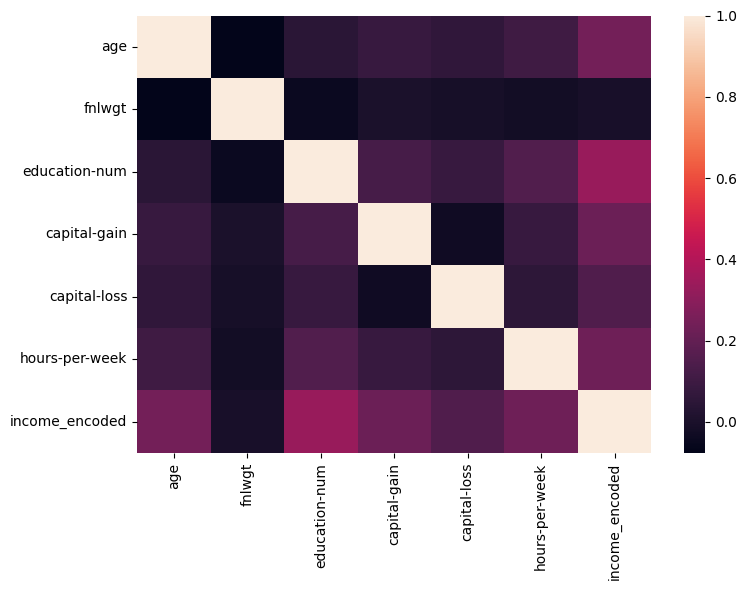

In [102]:
#print correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)
plt.tight_layout()
plt.savefig('Correlation Matrix Heat Map')
plt.show()

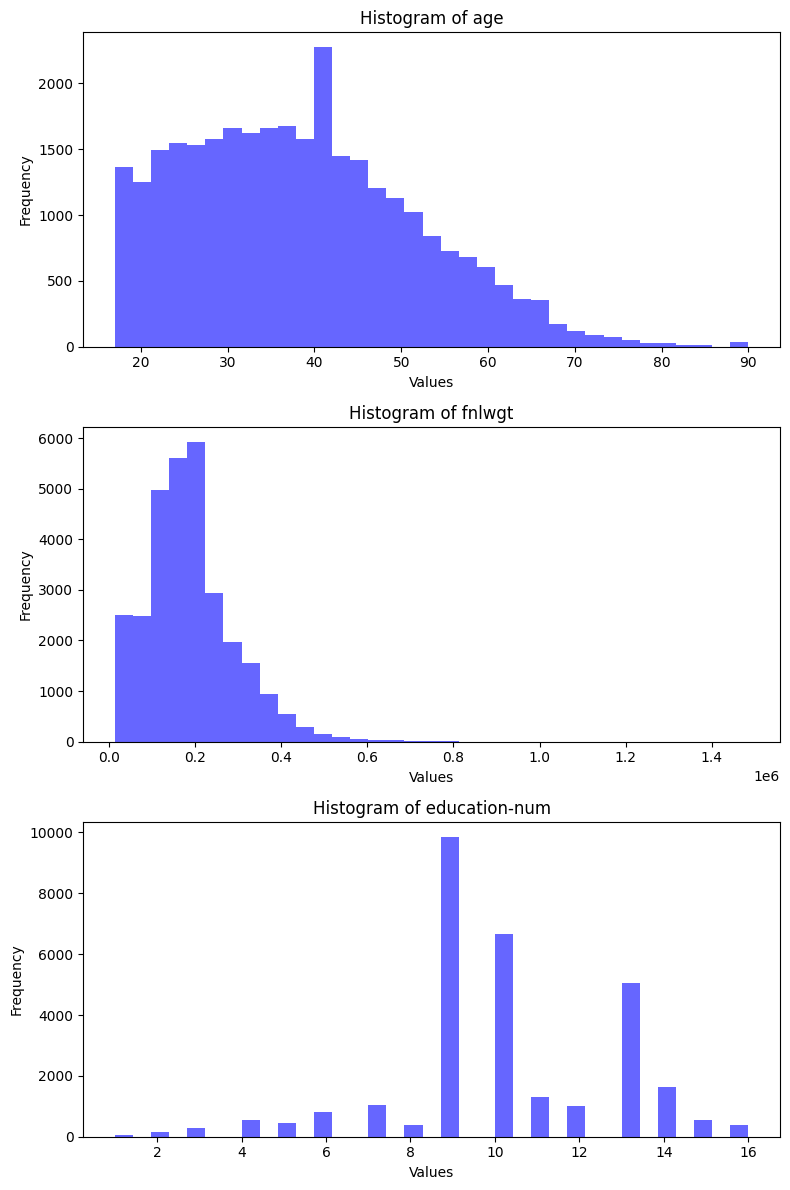

In [91]:
#Histograms of continous variables
continuous = ['age', 'fnlwgt', 'education-num']

# Create subplots for each continuous variable
fig, axs = plt.subplots(3, 1, figsize=(8, 12)) 

for i, col in enumerate(continuous):
    axs[i].hist(df[col], bins=35, alpha=0.6, color='blue')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.savefig('Histograms of continous variables')
plt.show()

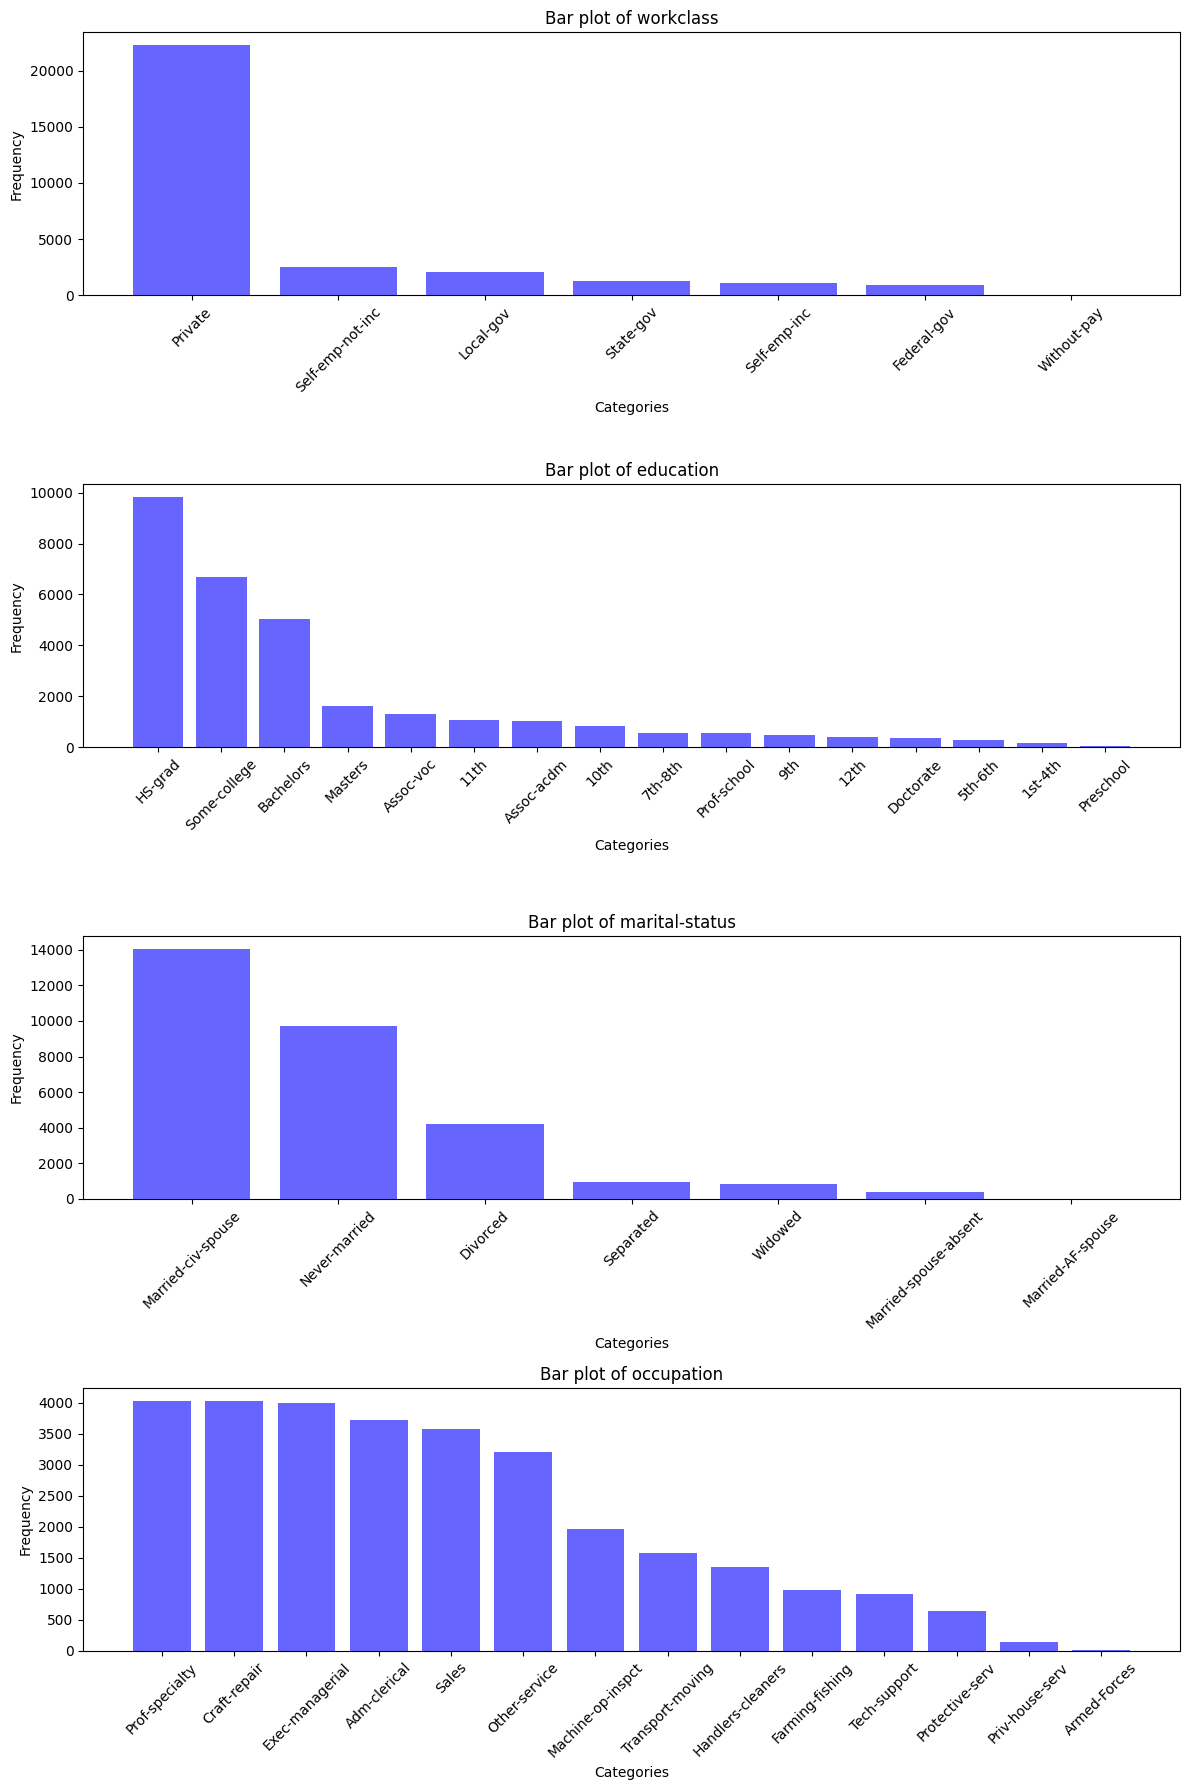

In [93]:
#Bargraphs for categorical variable
categorical = ['workclass', 'education', 'marital-status','occupation'] 

# Create subplots for each categorical variable
fig, axs = plt.subplots(len(categorical), 1, figsize=(12, 18)) 

for i, col in enumerate(categorical):
    value_counts = df[col].value_counts()
    axs[i].bar(value_counts.index, value_counts.values, alpha=0.6, color='blue')  # Creating a bar plot for each categorical variable
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Bar plot of {col}')
    axs[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.savefig('Barplots of categorical variables')
plt.show()

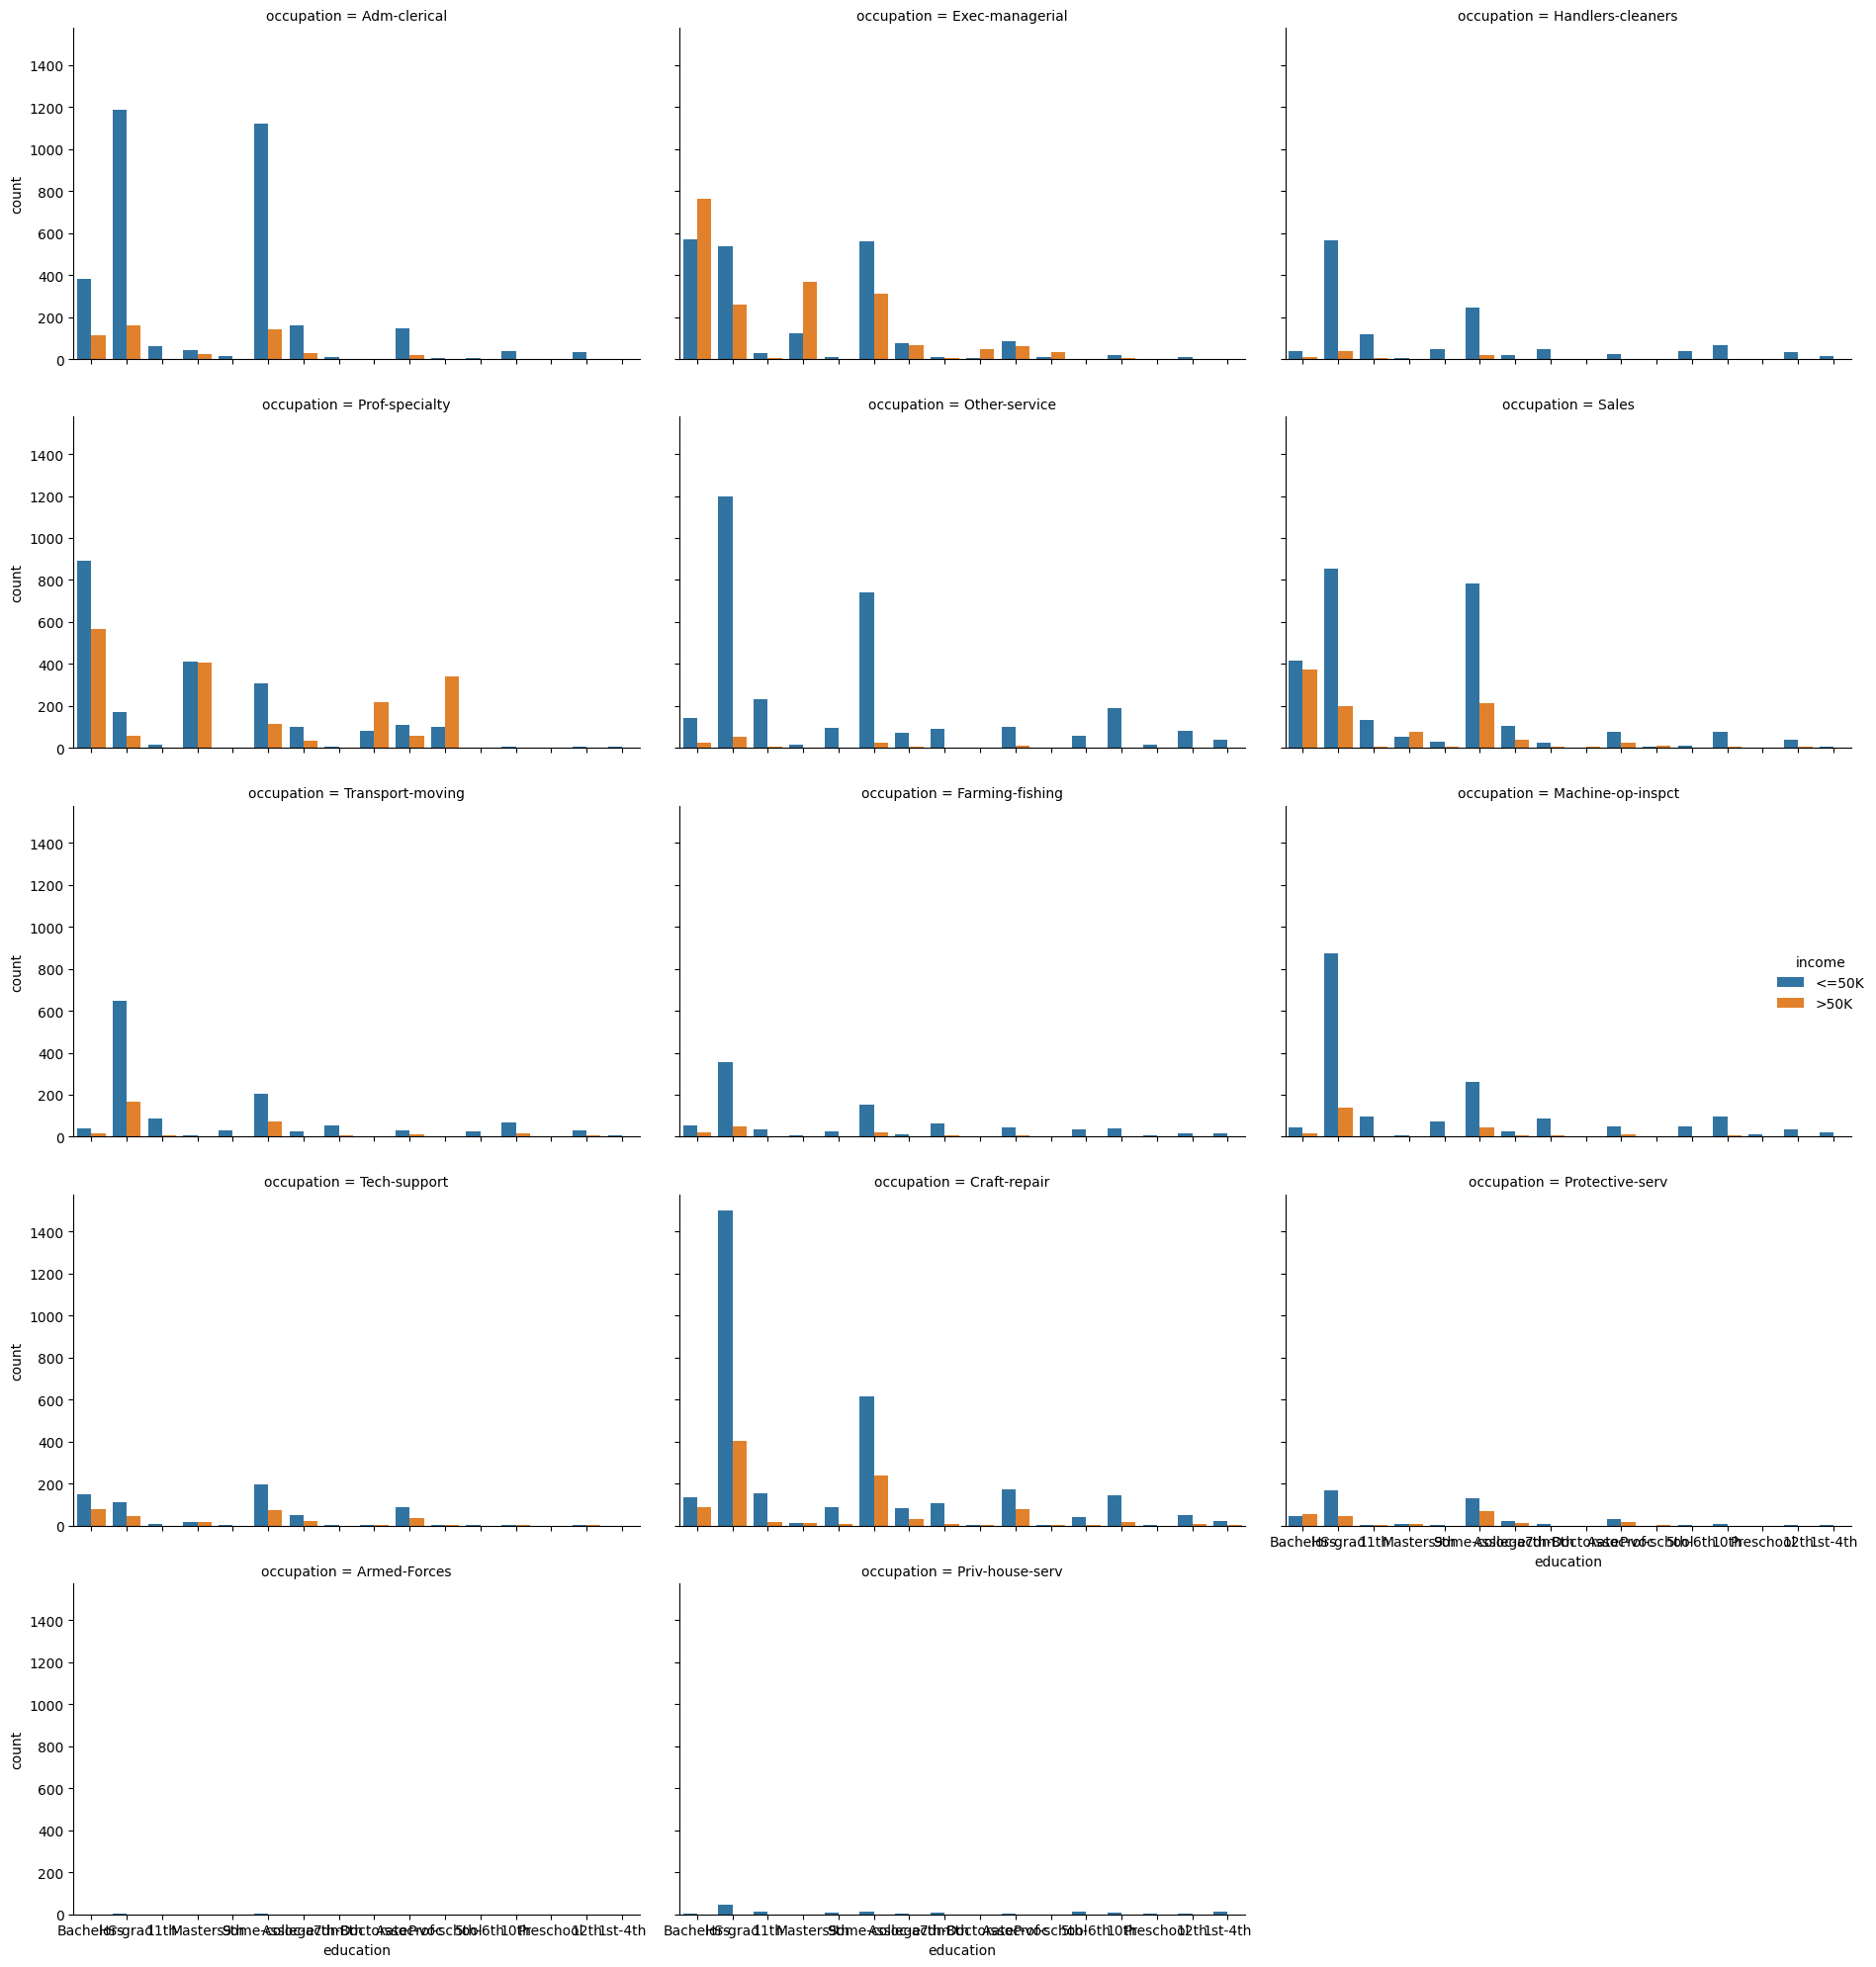

In [94]:
#Now, catplot
sns.catplot(x='education', hue='income', col='occupation', data=df, kind='count', col_wrap=3, height = 4, aspect = 1.5)
plt.tight_layout()
plt.show()

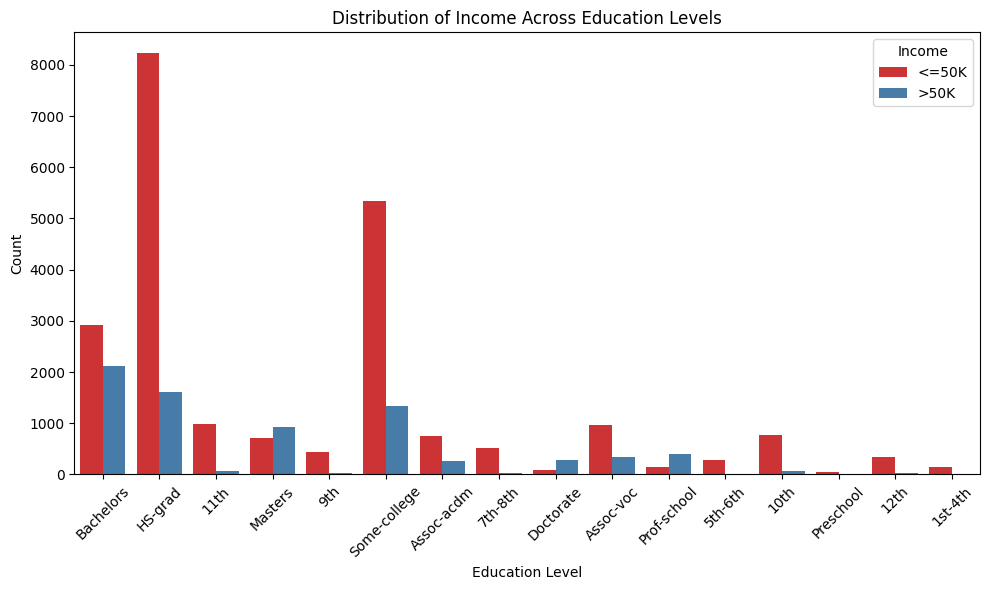

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=df, palette='Set1')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Income Across Education Levels')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of Income Across Education Levels')
plt.show()

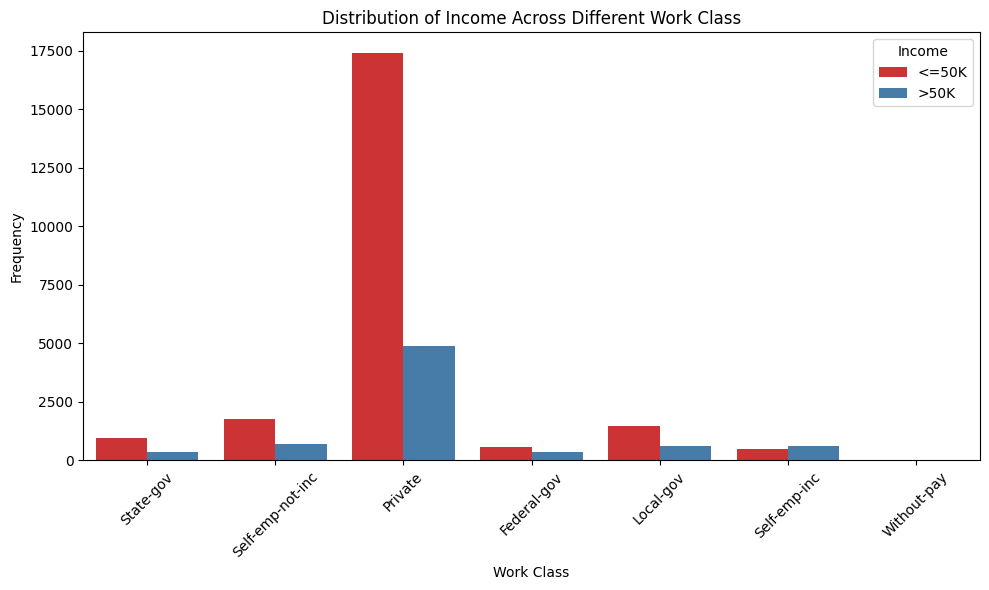

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=df, palette='Set1')
plt.xlabel('Work Class')
plt.ylabel('Frequency')
plt.title('Distribution of Income Across Different Work Class')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of Income Across Work Class')
plt.show()

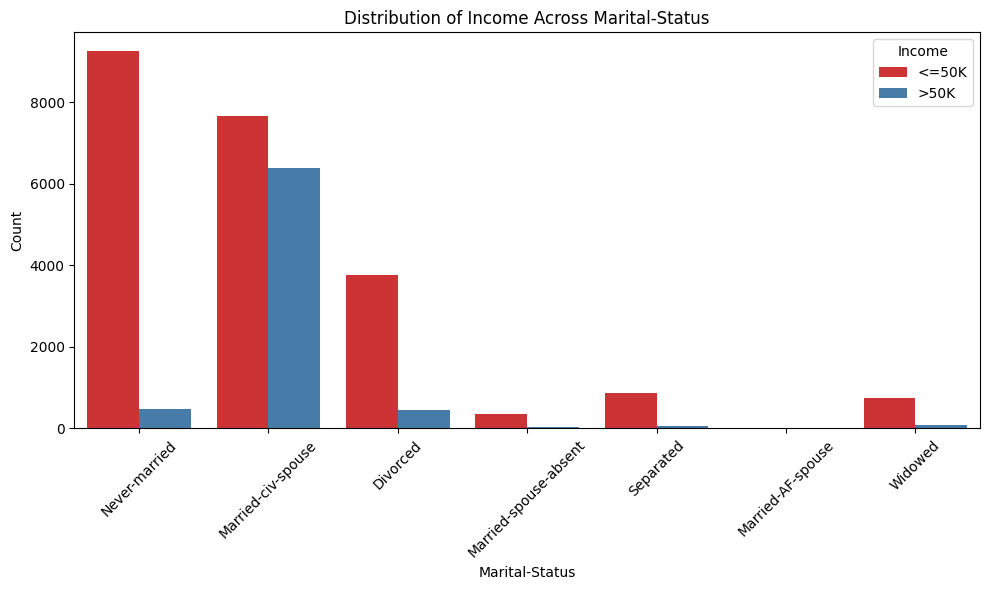

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=df, palette='Set1')
plt.xlabel('Marital-Status')
plt.ylabel('Count')
plt.title('Distribution of Income Across Marital-Status')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of Income Across Marital Status')
plt.show()

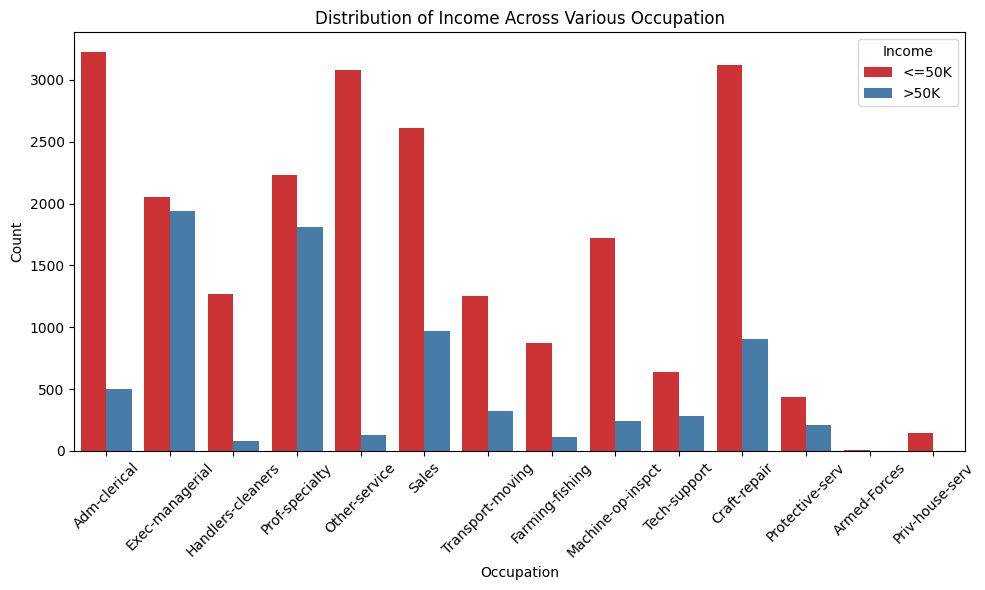

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=df, palette='Set1')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Income Across Various Occupation')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of Income Across Occupation')
plt.show()

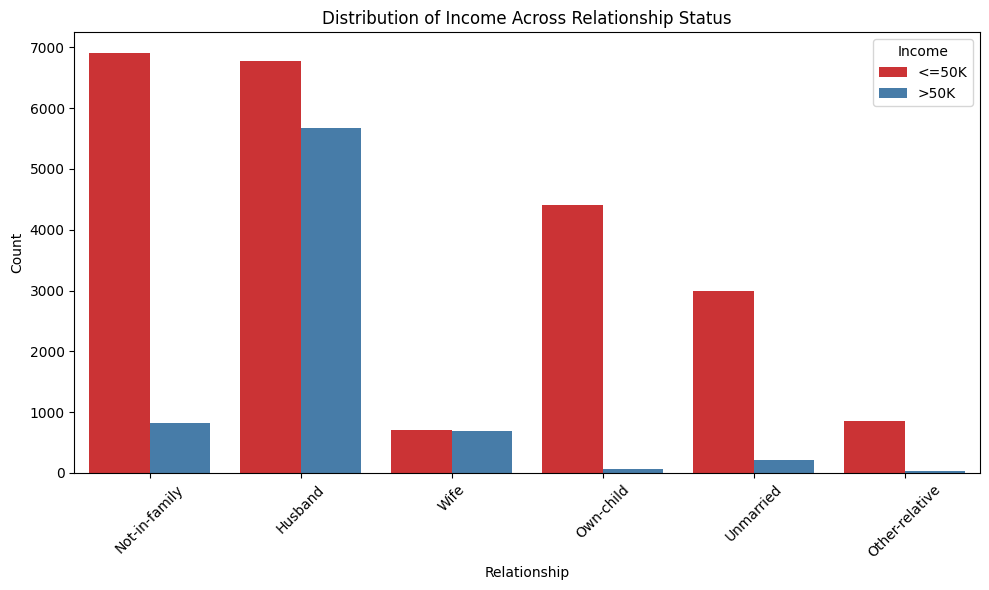

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=df, palette='Set1')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Distribution of Income Across Relationship Status')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Distribution of Income Across Relationship Status')
plt.show()

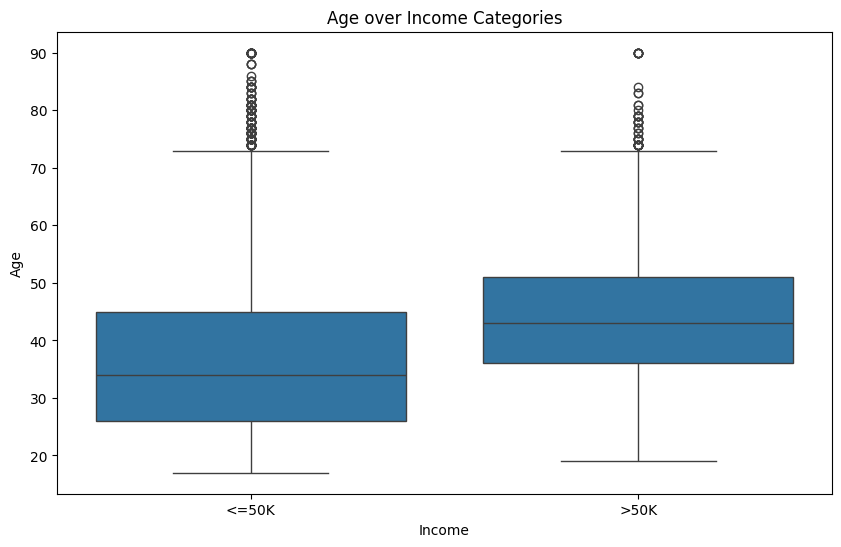

In [103]:
###
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age over Income Categories')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()